In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
# sns.set_style("whitegrid")  # 美化背景

## 导入数据

数据地址：http://data.openkg.cn/dataset/ch4masterpieces

In [14]:
# 读取数据
df = pd.read_csv('./data/三国演义/triples.csv')

df

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子
...,...,...,...,...
148,曹植,曹丕,younger_brother,弟弟
149,马谡,诸葛亮,colleague,同事
150,马谡,刘备,minister,臣
151,孙坚,孙权,father,父亲


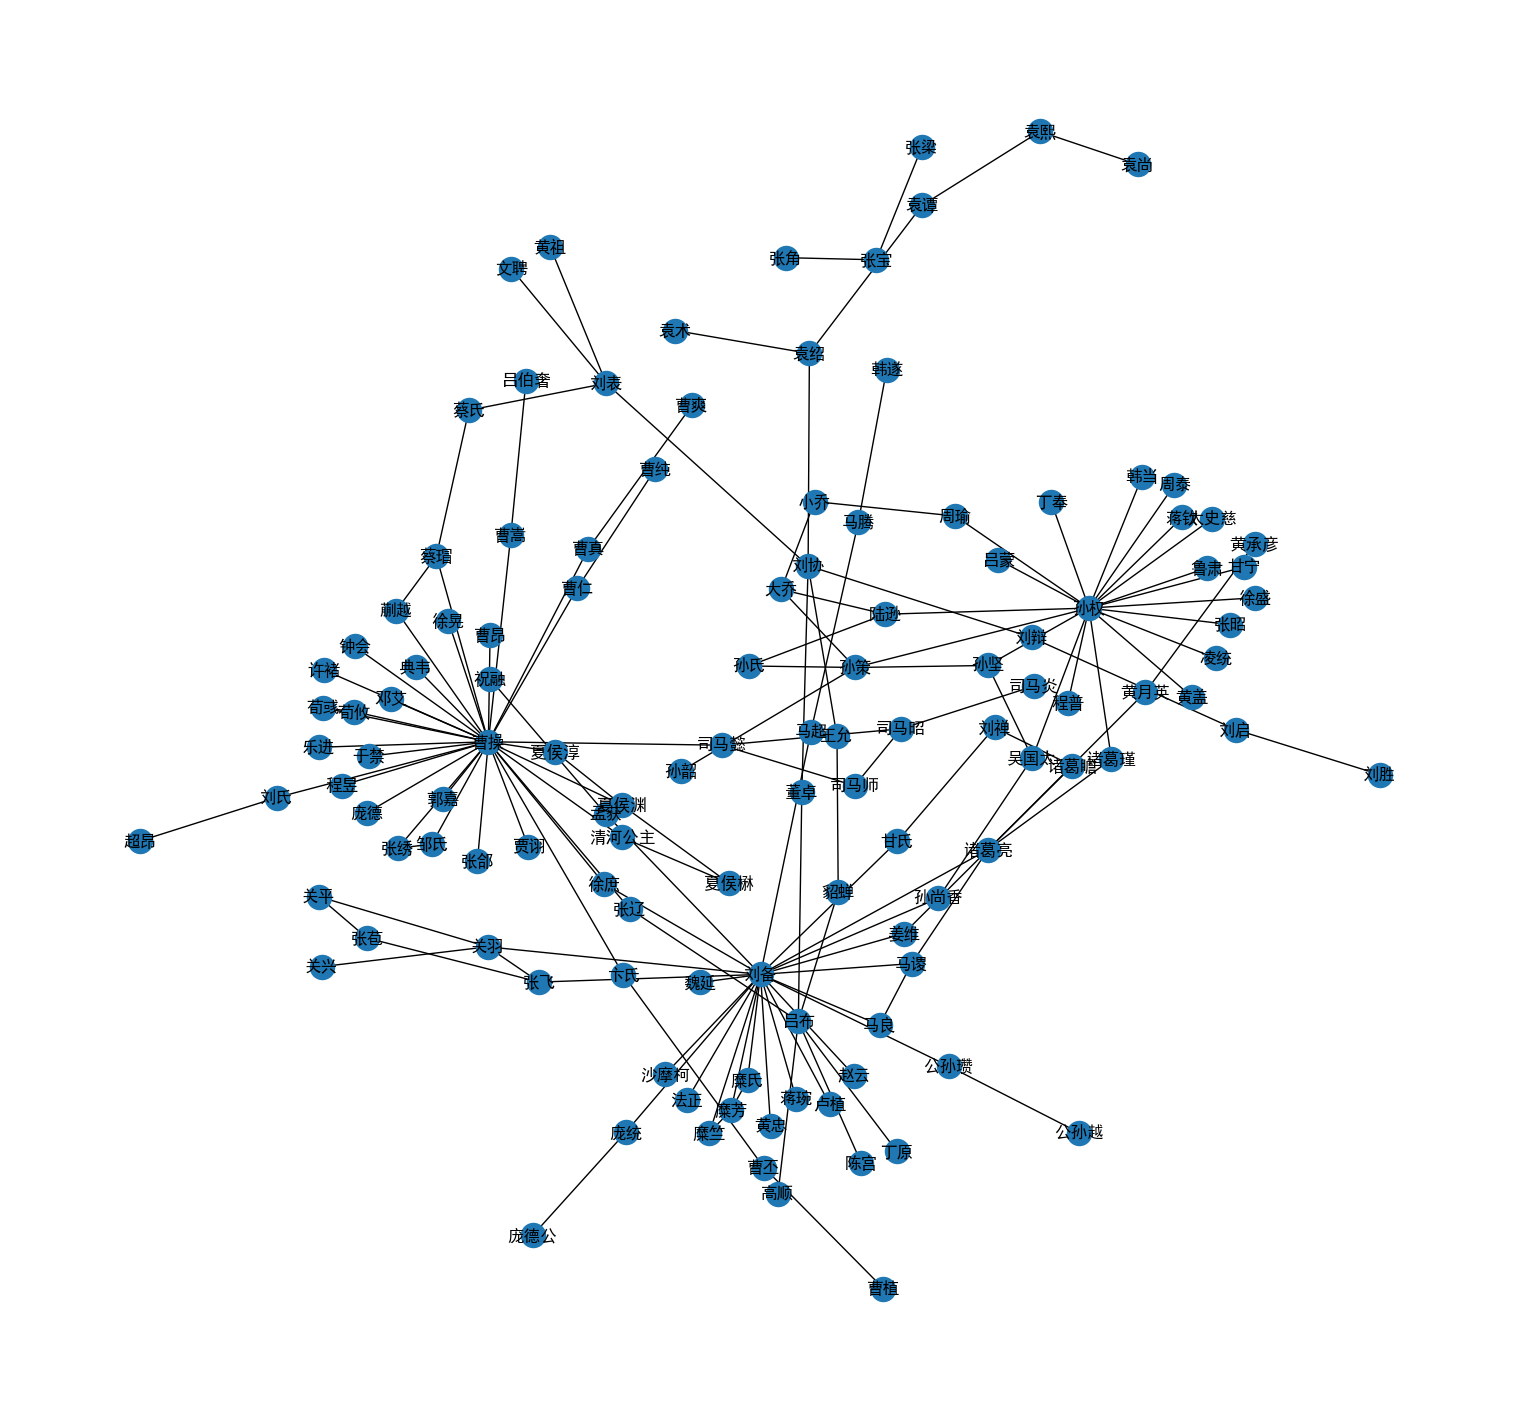

In [15]:
edges = [edeg for edeg in zip(df['head'],df['tail'])]
# edges
G = nx.Graph()
G.add_edges_from(edges)
G.nodes
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G,iterations=19,seed=9)
nx.draw(G,pos=pos,with_labels=True,font_weight='bold')


## 计算结点PageRank

In [16]:
# 计算PageRank
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-4)

# 计算节点大小和颜色
node_sizes = np.array(list(pagerank.values())) * 8000
node_colors = np.array(list(pagerank.values()))

# 计算边的颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)
pagerank

{'关羽': 0.012461603287752792,
 '刘备': 0.0674203415406853,
 '张飞': 0.009210838752218783,
 '张苞': 0.006669570791980519,
 '关兴': 0.0038661885408291215,
 '关平': 0.006706018185778401,
 '卢植': 0.0037243327615623352,
 '公孙瓒': 0.007461779605482134,
 '甘氏': 0.006647221285728918,
 '刘禅': 0.006825214098948398,
 '诸葛瞻': 0.006638865543578702,
 '诸葛亮': 0.01750873074373153,
 '姜维': 0.006220797585852502,
 '黄月英': 0.007446971418522581,
 '黄承彦': 0.004364359030896108,
 '诸葛瑾': 0.0064601981951135845,
 '公孙越': 0.004370723622526431,
 '马超': 0.007310080432422733,
 '马腾': 0.008332654597600173,
 '韩遂': 0.004805259865982349,
 '徐庶': 0.006425295101961942,
 '曹操': 0.09411059201425777,
 '刘胜': 0.004924492303021229,
 '刘启': 0.008705145340252782,
 '刘辩': 0.007777837319524553,
 '孙权': 0.060240615060926594,
 '孙尚香': 0.006322211533015994,
 '糜氏': 0.006290983220734946,
 '糜芳': 0.00905542569714348,
 '糜竺': 0.006290983220734946,
 '魏延': 0.0037243327615623352,
 '赵云': 0.0037243327615623352,
 '黄忠': 0.0037243327615623352,
 '庞统': 0.007461779605482134,
 '法正'

In [17]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

[('曹操', 0.09411059201425777),
 ('刘备', 0.0674203415406853),
 ('孙权', 0.060240615060926594),
 ('吕布', 0.02063701464997052),
 ('诸葛亮', 0.01750873074373153),
 ('刘协', 0.016817554007494902),
 ('孙策', 0.01517100916251941),
 ('刘表', 0.014277052378880328),
 ('关羽', 0.012461603287752792),
 ('张宝', 0.011665130967546813),
 ('袁绍', 0.011344891188403067),
 ('司马昭', 0.010581252505261707),
 ('司马懿', 0.009913039870212869),
 ('蔡瑁', 0.009715643093943196),
 ('夏侯渊', 0.009657100231146534),
 ('陆逊', 0.00935497572682565),
 ('大乔', 0.009247250428486502),
 ('吴国太', 0.009233793631464073),
 ('张飞', 0.009210838752218783),
 ('孙坚', 0.009110551482880952),
 ('糜芳', 0.00905542569714348),
 ('袁熙', 0.009011790767333765),
 ('马谡', 0.008864744603364512),
 ('刘启', 0.008705145340252782),
 ('曹丕', 0.008472694522677137),
 ('马腾', 0.008332654597600173),
 ('袁谭', 0.008326037851892489),
 ('刘辩', 0.007777837319524553),
 ('曹嵩', 0.007777515866834382),
 ('曹真', 0.007777515866834382),
 ('曹仁', 0.007777515866834382),
 ('刘氏', 0.007777515866834382),
 ('卞氏', 0.0

## 可视化

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

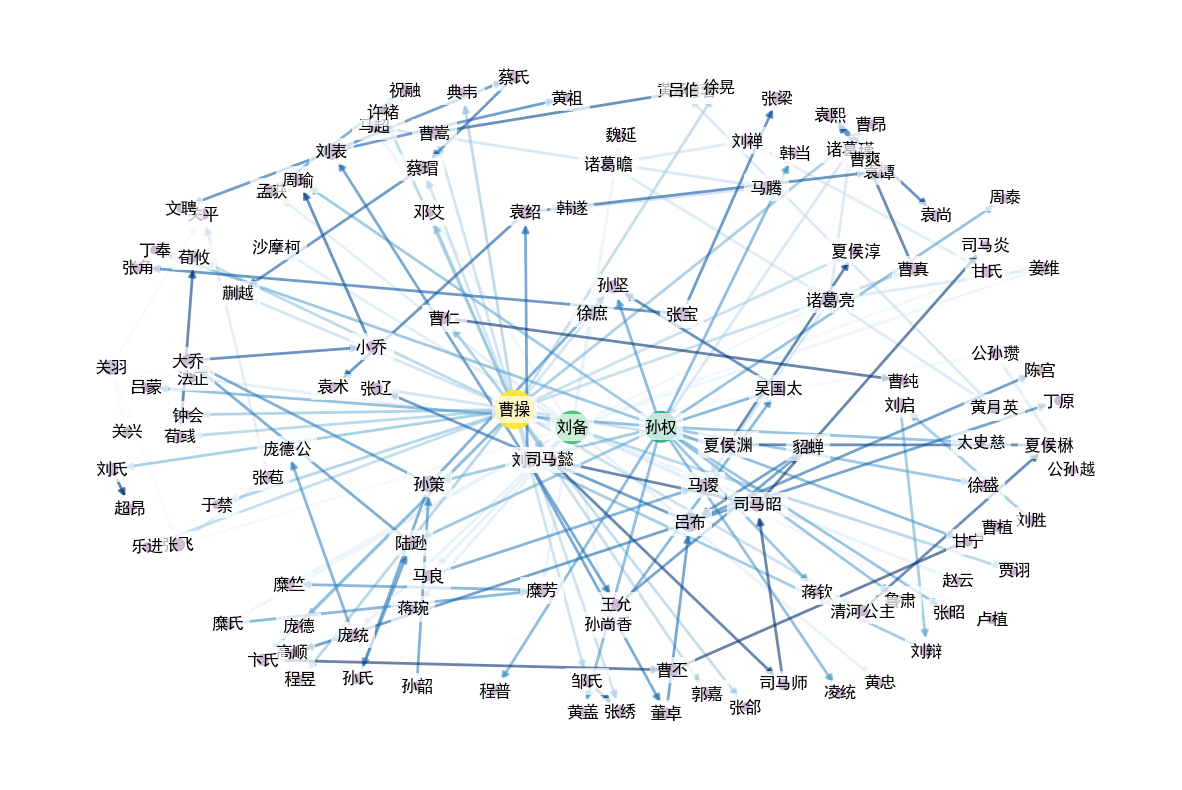

In [18]:
# 布局
pos = nx.spring_layout(G, k=0.5, iterations=30, seed=9)

# 绘图
plt.figure(figsize=(15, 10))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               cmap=plt.cm.viridis,
                               alpha=0.9)

# 绘制边
edges = nx.draw_networkx_edges(G, pos,
                               edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               width=2, alpha=0.6,
                               arrows=True,
                               arrowstyle='-|>',
                               min_target_margin=5)

# 绘制标签
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold',
                                 bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# 关闭坐标轴
plt.axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label="PageRank 值")
plt.title("人物关系图 - PageRank", fontsize=16, fontweight='bold')
plt.show()

In [77]:
import pandas as pd
import networkx as nx
from pyecharts import options as opts
from pyecharts.charts import Graph

# 读取数据
df = pd.read_csv('./data/水浒传/triples.csv')

# 构建有向图
edges = [tuple(edge) for edge in zip(df['head'], df['tail'])]
G = nx.DiGraph()
G.add_edges_from(edges)

# 计算 PageRank
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-4)

# 归一化 PageRank 值（用于节点大小）
min_size, max_size = 10, 50
pr_values = list(pagerank.values())
min_pr, max_pr = min(pr_values), max(pr_values)

normalize = lambda x: min_size + (max_size - min_size) * (x - min_pr) / (max_pr - min_pr)

# 构造 pyecharts 图数据
nodes = [
    {"name": node, "symbolSize": normalize(pagerank[node]), "value": round(pagerank[node], 4)}
    for node in G.nodes
]

links = [{"source": u, "target": v} for u, v in G.edges]

# 创建交互式图表
graph = (
    Graph()
    .add(
        "",
        nodes,
        links,
        layout="force",  # 力导向布局
        repulsion=3000,  # 增强排斥力，避免节点重叠
        edge_symbol=["circle", "arrow"],  # 让边显示方向
        edge_symbol_size=8,
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="西游记人物关系图 - PageRank"),
        toolbox_opts=opts.ToolboxOpts(),  # 添加工具箱
        visualmap_opts=opts.VisualMapOpts(
            min_=min_pr, max_=max_pr, dimension=2, is_piecewise=False
        ),
    )
)

# 渲染 HTML（可直接在浏览器中打开）
graph.render("西游记人物关系图.html")


'C:\\Users\\28706\\Desktop\\2025计算机设计大赛\\PR-HITS-Influence\\Py_NetGraph\\notebooks\\四大名著\\西游记人物关系图.html'